## Laborator 8

1. a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

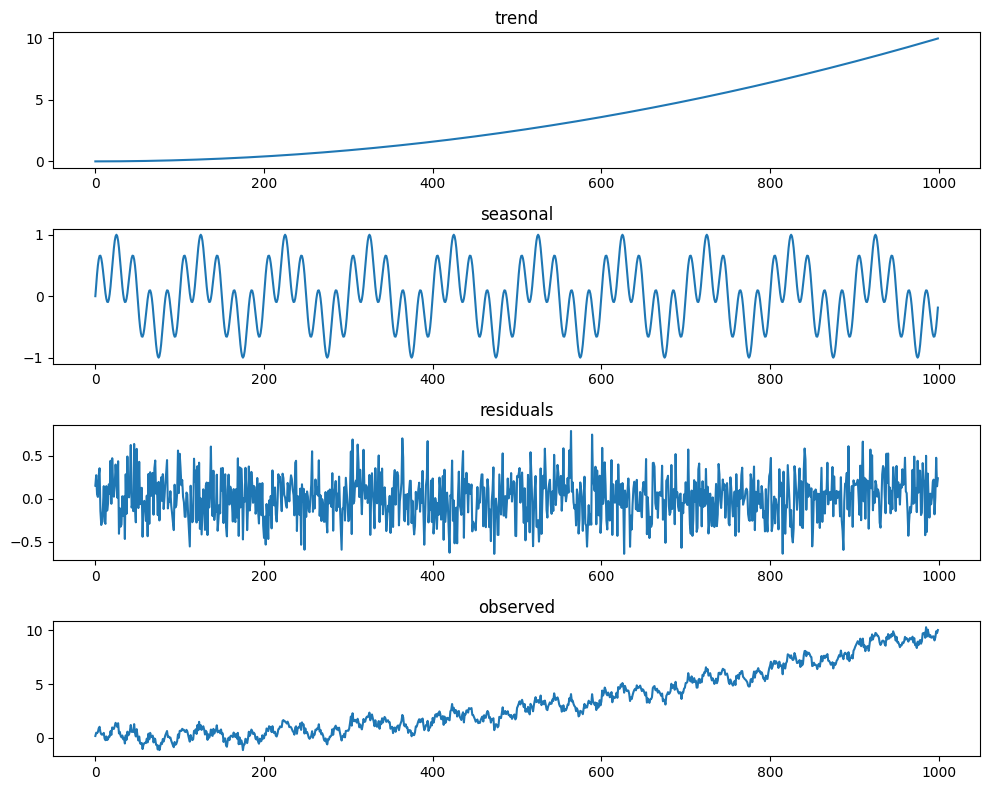

In [15]:
N = 1000
t = np.arange(N)

trend = 1e-5 * t ** 2 
seasonal = (np.sin(2 * np.pi * t * 1 /20) + np.sin(2 * np.pi * t * 1 / 100)) / 2 
residuals = np.random.normal(0, 1, N) / 4
time_series = trend + seasonal + residuals
plots = [trend, seasonal, residuals, time_series]
labels = ['trend', 'seasonal', 'residuals', 'observed']

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
for i, p in enumerate(plots):
    ax[i].plot(t, p)
    ax[i].set_title(labels[i])
plt.tight_layout()
plt.savefig('a.pdf')
plt.show()



b)

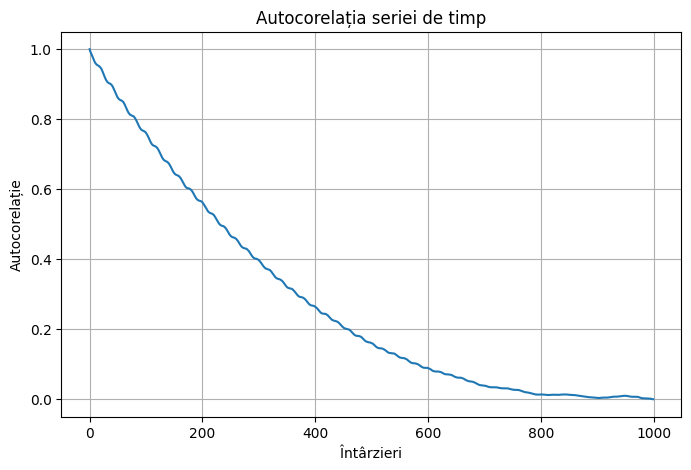

In [44]:
# Generam autocorelatia
auto_corr = np.correlate(time_series, time_series, mode='full') 

# Normalizam la 1
auto_corr /= np.max(auto_corr)

# Eliminam jumatatea din stanga
auto_corr = auto_corr[auto_corr.size // 2:]

plt.figure(figsize=(8, 5))
plt.title('Autocorelația seriei de timp')
plt.plot(auto_corr)
plt.xlabel('Întârzieri')
plt.ylabel('Autocorelație')
plt.grid(True)
plt.savefig('b.pdf')
plt.show()


c)

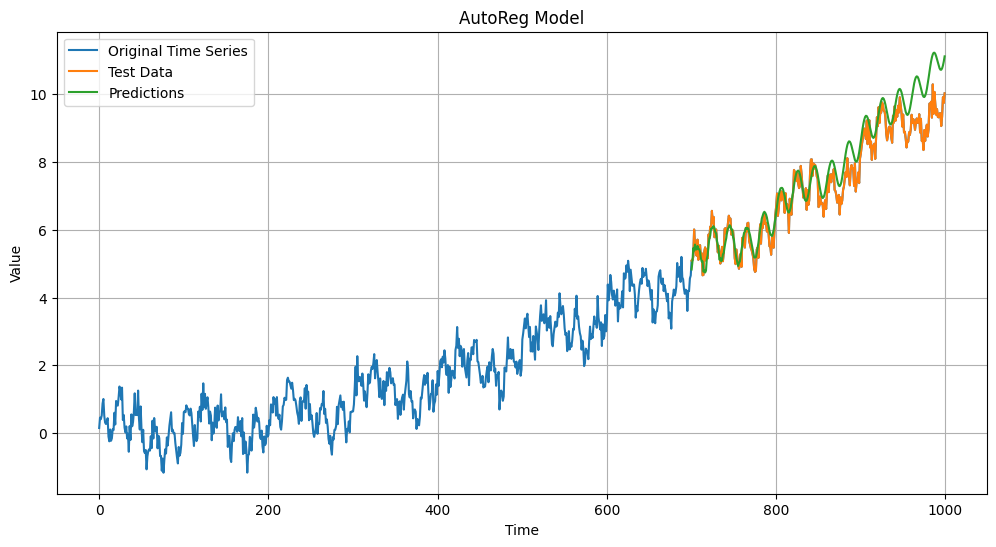

In [45]:
from statsmodels.tsa.ar_model import AutoReg

train_size = 700

train_t, train_series = t[:train_size], time_series[:train_size]
test_t, test_series = t[train_size:], time_series[train_size:]

p = 60

model = AutoReg(train_series, lags=p).fit()
predictions = model.predict(start=train_size, end=N-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(t, time_series, label='Original Time Series')
plt.plot(test_t, test_series, label='Test Data')
plt.plot(test_t, predictions, label='Predictions')
plt.title('AutoReg Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.savefig('c.pdf')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
from itertools import product

rmse = float('inf')
best_params = {'p': None, 'm': None}

for p, m in product(range(1, 50), range(1, 50)):
    model = AutoReg(train_series, lags=p).fit()
    predictions = model.predict(start=train_size, end=train_size + m - 1, dynamic=False)

    mse = mean_squared_error(test_series[:m], predictions)
    if mse < rmse: 
        rmse = mse
        best_params['p'] = p
        best_params['m'] = m

print(f'Cel mai bun p: {best_params["p"]}')
print(f'Cel mai bun m: {best_params["m"]}')
print(f'MSE: {rmse}')


Cel mai bun p: 11
Cel mai bun m: 1
MSE: 0.0011636507048208315
